In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data = pd.read_csv('model/keypoint_classifier/keypoint.csv', header=None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0.0,0.0,0.338710,-0.104839,0.600806,-0.439516,0.782258,-0.713710,0.963710,...,-0.040323,-0.645161,-0.294355,-0.758065,-0.342742,-0.915323,-0.286290,-0.697581,-0.241935,-0.629032
1,1,0.0,0.0,-0.073986,-0.171838,-0.019093,-0.360382,0.093079,-0.448687,0.207637,...,0.229117,-0.267303,0.336516,-0.264916,0.355609,-0.286396,0.319809,-0.238663,0.274463,-0.195704
2,1,0.0,0.0,-0.071090,-0.165877,-0.016588,-0.355450,0.097156,-0.440758,0.208531,...,0.239336,-0.258294,0.341232,-0.267773,0.369668,-0.277251,0.331754,-0.227488,0.281991,-0.184834
3,1,0.0,0.0,-0.080569,-0.156398,-0.033175,-0.343602,0.071090,-0.436019,0.182464,...,0.229858,-0.260664,0.336493,-0.277251,0.357820,-0.286730,0.319905,-0.234597,0.270142,-0.189573
4,1,0.0,0.0,-0.175610,-0.163415,-0.241463,-0.373171,-0.212195,-0.526829,-0.143902,...,0.012195,-0.363415,0.241463,-0.358537,0.143902,-0.412195,0.092683,-0.370732,0.080488,-0.302439


One good thing about making your own data is that there isn't really a need for data cleaning!

## Setting up the Model
Lets start laying out the Neural Network for this problem. Each activation function is industry standard, meaning we are shooting for best accuracy known to man or something idk.

In [3]:
X = raw_data.iloc[:, 1:].values.astype(np.float32)  # All columns except the first
y = raw_data.iloc[:, 0].values.astype(np.int32) # First column

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80/20 split, Seed=42

In [5]:
# Ok, so now I have to build the neural network.
# Here is kind of a breakdown of what I want:
# Input Layer: 42 neurons (21 keypoints with x and y coordinates)
# Hidden Layer 1: 128 neurons, ReLU activation  (ReLU is a common choice for hidden layers)
# Hidden Layer 2: 64 neurons, ReLU activation
# Output Layer: 4 neurons (4 classes), Softmax activation (for multi-class classification)

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(42,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# The sparse loss function one-hot encodes our data
# The metrics is for what you need to calculate

## Training the Model
Woohooo we actually got the neural network configured, now we move onto actually training the data. Big man shit.

In [7]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=2,
)

Epoch 1/1000


1/1 - 1s - 602ms/step - accuracy: 0.1429 - loss: 1.4782 - val_accuracy: 0.0000e+00 - val_loss: 1.4694
Epoch 2/1000
1/1 - 0s - 30ms/step - accuracy: 0.1429 - loss: 1.4106 - val_accuracy: 0.0000e+00 - val_loss: 1.4074
Epoch 3/1000
1/1 - 0s - 28ms/step - accuracy: 0.1429 - loss: 1.3514 - val_accuracy: 0.5000 - val_loss: 1.3521
Epoch 4/1000
1/1 - 0s - 29ms/step - accuracy: 0.7143 - loss: 1.3004 - val_accuracy: 0.5000 - val_loss: 1.3066
Epoch 5/1000
1/1 - 0s - 34ms/step - accuracy: 0.8571 - loss: 1.2543 - val_accuracy: 0.5000 - val_loss: 1.2671
Epoch 6/1000
1/1 - 0s - 32ms/step - accuracy: 0.8571 - loss: 1.2115 - val_accuracy: 0.5000 - val_loss: 1.2328
Epoch 7/1000
1/1 - 0s - 32ms/step - accuracy: 0.8571 - loss: 1.1720 - val_accuracy: 0.5000 - val_loss: 1.2038
Epoch 8/1000
1/1 - 0s - 29ms/step - accuracy: 0.8571 - loss: 1.1344 - val_accuracy: 0.5000 - val_loss: 1.1836
Epoch 9/1000
1/1 - 0s - 32ms/step - accuracy: 0.8571 - loss: 1.1049 - val_accuracy: 0.5000 - val_loss: 1.1700
Epoch 10/1000


## Validating the Model
Is the model any good chat?

In [8]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.5400e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


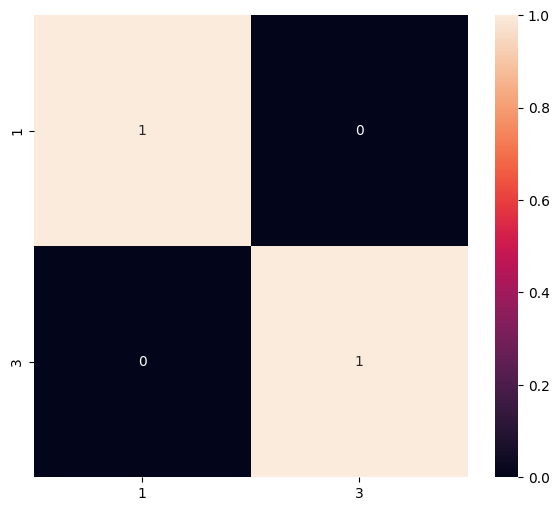

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)